# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import time, datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time, datetime

# 1. Problem Statement

**Client had a problem in predicting the price of ticket for a flight**

# 2. Data Gathering and validation

The objective of the case study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. 'Easemytrip' is an internet platform for booking flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Overall, I have to build a model that can precisely predict the ticket price.

###### Brain Storming
*By getting problem of the client, i have some questions in my mind, which are follow*

*a) Does price vary with Airlines?*

*b) How is the price affected when tickets are bought in just 1 or 2 days before departure?*

*c) Does ticket price change based on the departure time and arrival time?*

*d) How the price changes with change in Source and Destination?*

*e) How does the ticket price vary between Economy and Business class?, etc*

###### Data is seperated in to two parts:
*one for **economy class** tickets and another for **business class** tickets.*

*A total of 300261 distinct flight booking options are available. And these are for 50 days, from February 11th to March 31st, 2022.*

### Loading the files in data frames

In [2]:
a = pd.read_csv("business.csv")
a.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [3]:
b = pd.read_csv("economy.csv")
b.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


##### Initial Preprocessing
*as we can see the there is highly noise in the data. So, we will do some cleaning and also drive some relevent featues from the given data*

*we will drive new featue named class to specify in which class the ticket is booked*

*we wil drive new featute named flight by adding ch_code and num_code of the flight*

*we will drive new feature days left by subtracting the booking date from journey date*

In [4]:
#adding  the new feature named class
a["class"] = "business"
b["class"] = "economy"

In [5]:
# appending two data sets and storing in the new data frame
new = b.append(a,ignore_index = True)
new.head(3)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy


In [6]:
new.tail(3)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business
300260,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"81,585",business


In [7]:
# merging two columns (ch_code and "num_code") and making new feature flight
new.num_code = new.num_code.astype("str")
new["flight"] = new["ch_code"] +"-"+ new["num_code"]
new.drop(["ch_code","num_code"],axis = 1,inplace = True)

In [8]:
new.head(2)

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157


In [9]:
# renaming the featuers
new.rename({"dep_time": "departure_time", "from": "source_city", 
            "time_taken": "duration", "stop": "stops", "arr_time": "arrival_time",
           "to":"destination_city"}, axis = 1, inplace = True)

In [10]:
dd = pd.DataFrame(new["date"].str.split("-",expand = True).to_numpy().astype(int),columns = ["day","month","year"])
new["days_left"] = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))
new.head(5)

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709,1
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157,1
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764,1
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995,1
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963,1


In [11]:
new.tail(5)

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
300256,31-03-2022,Vistara,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business,UK-822,49
300257,31-03-2022,Vistara,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business,UK-826,49
300258,31-03-2022,Vistara,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business,UK-832,49
300259,31-03-2022,Vistara,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business,UK-828,49
300260,31-03-2022,Vistara,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"81,585",business,UK-822,49


In [12]:
# as we drived one feature on the basis of date so no need for this featue so we will drop it
new.drop("date",axis = 1,inplace = True)

In [13]:
# converting time into morning/noon/evening, etc
s = (pd.to_datetime(new["departure_time"]).dt.hour % 24 + 4) // 4 #give numbers from 1 to 6 #(return a series)
s.replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 
                      4: 'Afternoon', 5: 'Evening', 6: 'Night'} ,inplace = True) # to replace values 1:latenight to 6: night
new["departure_time"] = s 
new.head(5)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709,1
1,SpiceJet,Early Morning,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157,1
2,AirAsia,Early Morning,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764,1
3,Vistara,Morning,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995,1
4,Vistara,Morning,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963,1


In [14]:
# we also can get morning eveniing categories by making bins
#  our bins are (0,4,8,12,16,20,24) respected labels starts from "latenight" to "night"
temp = pd.DataFrame(new["arrival_time"].str.split(":",expand = True).to_numpy().astype(int), 
                    columns = ["hour","minute"])
new["arrival_time"] = pd.cut(x = temp["hour"], bins = 6, labels = 
                             ["Late Night","Early Morning","Morning", "Afternoon", "Evening", "Night"])
new.head(5)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,02h 10m,non-stop,Night,Mumbai,"5,953",economy,SG-8709,1
1,SpiceJet,Early Morning,Delhi,02h 20m,non-stop,Morning,Mumbai,"5,953",economy,SG-8157,1
2,AirAsia,Early Morning,Delhi,02h 10m,non-stop,Early Morning,Mumbai,"5,956",economy,I5-764,1
3,Vistara,Morning,Delhi,02h 15m,non-stop,Afternoon,Mumbai,"5,955",economy,UK-995,1
4,Vistara,Morning,Delhi,02h 20m,non-stop,Morning,Mumbai,"5,955",economy,UK-963,1


In [15]:
import re

In [16]:
# making duration in float values by calculating only hours
temp = pd.DataFrame(new["duration"].str.split(expand = True).to_numpy().astype(str), 
                    columns = ["hour","minute"])
temp["hour"] = temp["hour"].apply(lambda x: re.sub("[^0-9]","",x)).astype(int)
temp["minute"] = temp["minute"].apply(lambda r: re.sub("[^0-9]","",r)) # we has no values in minute colum some where 
temp["minute"] = np.where(temp["minute"] == "", 0, temp["minute"]) # replaceing "" with 0
temp["minute"] = temp["minute"].astype(int) #converting data type
new["duration"] = np.around((temp["hour"] + (temp["minute"]/60)),2) #savin the total hours in duration feature


In [17]:
new.head(3)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,2.17,non-stop,Night,Mumbai,"5,953",economy,SG-8709,1
1,SpiceJet,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,"5,953",economy,SG-8157,1
2,AirAsia,Early Morning,Delhi,2.17,non-stop,Early Morning,Mumbai,"5,956",economy,I5-764,1


In [18]:
# making the stops in numeric data type by giving stops accordingly
new["stops"] = new["stops"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
new["stops"] = np.where(new["stops"] == "", 0, new["stops"]) # replacign "" with 0
new["stops"] = new["stops"].astype(int) # changing object to int
new.head(5)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,"5,953",economy,SG-8709,1
1,SpiceJet,Early Morning,Delhi,2.33,0,Morning,Mumbai,"5,953",economy,SG-8157,1
2,AirAsia,Early Morning,Delhi,2.17,0,Early Morning,Mumbai,"5,956",economy,I5-764,1
3,Vistara,Morning,Delhi,2.25,0,Afternoon,Mumbai,"5,955",economy,UK-995,1
4,Vistara,Morning,Delhi,2.33,0,Morning,Mumbai,"5,955",economy,UK-963,1


In [19]:
new.tail(5)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
300256,Vistara,Morning,Chennai,10.08,1,Evening,Hyderabad,"69,265",business,UK-822,49
300257,Vistara,Afternoon,Chennai,10.42,1,Night,Hyderabad,"77,105",business,UK-826,49
300258,Vistara,Early Morning,Chennai,13.83,1,Night,Hyderabad,"79,099",business,UK-832,49
300259,Vistara,Early Morning,Chennai,10.00,1,Evening,Hyderabad,"81,585",business,UK-828,49
300260,Vistara,Morning,Chennai,10.08,1,Evening,Hyderabad,"81,585",business,UK-822,49


In [20]:
# removing noise from price column
new["price"] = new["price"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
new["price"] = new["price"].astype(int) # changing object to int
new.head(3)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,economy,SG-8709,1
1,SpiceJet,Early Morning,Delhi,2.33,0,Morning,Mumbai,5953,economy,SG-8157,1
2,AirAsia,Early Morning,Delhi,2.17,0,Early Morning,Mumbai,5956,economy,I5-764,1


In [21]:
# arranging the features 
new = new[["airline","flight","source_city","departure_time","stops",
     "arrival_time","destination_city","class","duration","days_left","price"]]

In [22]:
# exporting the file in csv
# new.to_csv("Clean_flight_data_shaumil.csv", index = False)

**now we have clean data for our model**

The various features of the cleaned dataset are explained below:

**1) Airline:** The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

**2) Flight:** Flight stores information regarding the plane's flight code. It is a categorical feature.

**3) Source City:** City from which the flight takes off. It is a categorical feature having 6 unique cities.

**4) Departure Time:** This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

**5) Stops:** A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

**6) Arrival Time:** This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

**7) Destination City:** City where the flight will land. It is a categorical feature having 6 unique cities.

**8) Class:** A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

**9) Duration:** A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

**10)Days Left:** This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

**11) Price:** Target variable stores information of the ticket price.

# EDA

In [23]:
#making a new copy
df = new
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
299687,Vistara,UK-834,Chennai,Evening,1,Morning,Hyderabad,business,16.50,37,51457
18921,GO FIRST,G8-336,Delhi,Afternoon,1,Night,Bangalore,economy,8.42,44,4020
275368,Vistara,UK-860,Hyderabad,Early Morning,0,Morning,Delhi,business,2.17,12,24234
127873,Vistara,UK-720,Kolkata,Early Morning,1,Afternoon,Mumbai,economy,6.83,4,12210
279267,Air India,AI-698,Hyderabad,Night,0,Night,Mumbai,business,1.67,32,17738


In [24]:
# getting no null values in the data frame
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [25]:
# getting all the details of the data frame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   airline           300261 non-null  object  
 1   flight            300261 non-null  object  
 2   source_city       300261 non-null  object  
 3   departure_time    300261 non-null  object  
 4   stops             300261 non-null  int64   
 5   arrival_time      300261 non-null  category
 6   destination_city  300261 non-null  object  
 7   class             300261 non-null  object  
 8   duration          300261 non-null  float64 
 9   days_left         300261 non-null  int64   
 10  price             300261 non-null  int64   
dtypes: category(1), float64(1), int64(3), object(6)
memory usage: 23.2+ MB
None


In [26]:
# getting all statical insights of the numarical features 
df.describe()

,stops,duration,days_left,price
count,300261.000000,300261.000000,300261.000000,300261.000000
mean,0.924213,12.219142,26.004473,20883.717666
std,0.398188,7.200348,13.560985,22695.911266
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,103.000000,49.000000,123071.000000


In [27]:
# we has two duplicte rows
df.duplicated().sum()

2

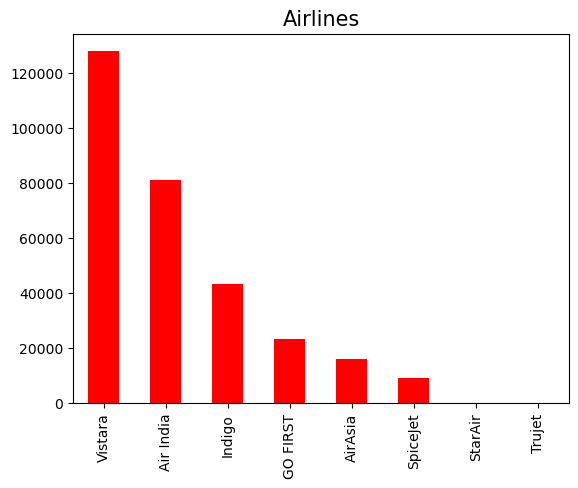

In [28]:
# checking what are the values for each category in airline feature
df["airline"].value_counts().plot(kind = "bar",cmap='flag')
plt.title('Airlines',fontsize=15)
plt.show()

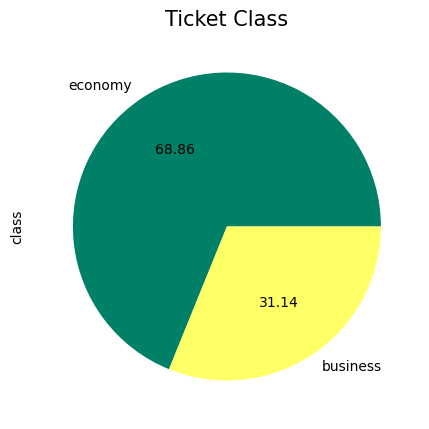

In [34]:
# checking what are the percentage values for each category in ticket class feature
plt.figure(figsize = (5,5))
df['class'].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = "summer" )
plt.title('Ticket Class',fontsize=15)
plt.show()

**Q1) Does price vary with Airlines?**

Trujet is the cheapest airline and Vistara is the most expansive one

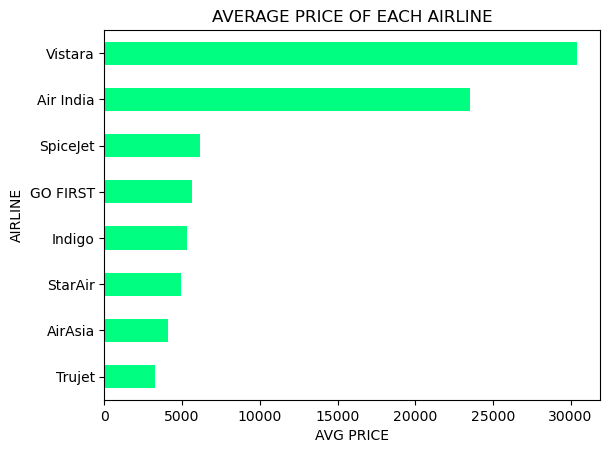

In [35]:
s = df.groupby("airline")["price"].mean().sort_values()
s.plot(kind = "barh",cmap = "winter_r")
plt.ylabel("AIRLINE")
plt.xlabel("AVG PRICE")
plt.title("AVERAGE PRICE OF EACH AIRLINE")
plt.show()

##### Q2. How is the price affected when tickets are bought in just 1 or 2 days before departure?
**Ans:** Yes price is affected when tickets are bought in just 1 or 2 days before

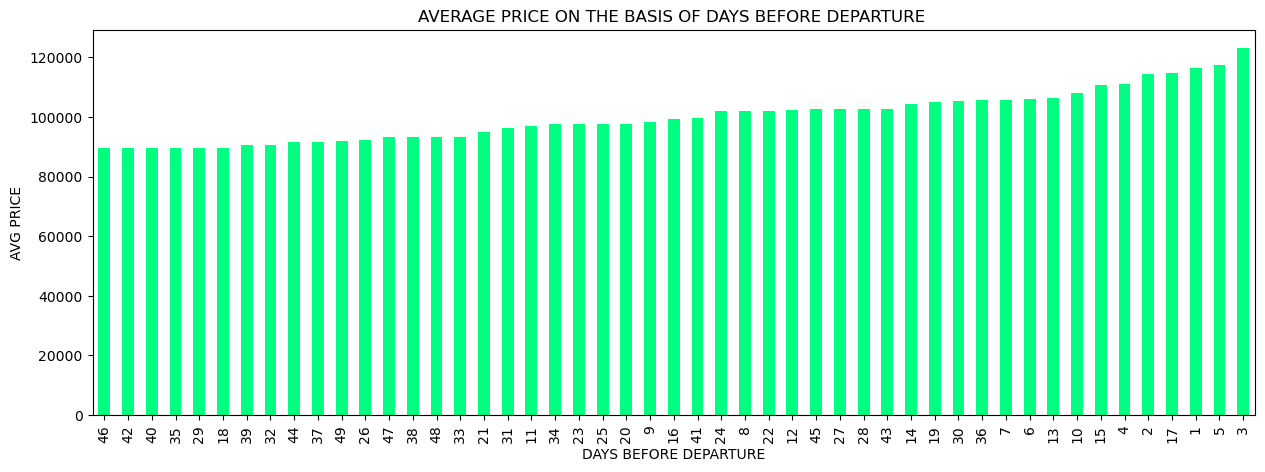

In [36]:
plt.figure(figsize = (15,5))
s = df.groupby(["days_left"])["price"].max().sort_values()
s.plot(kind = "bar",cmap = "winter_r")
plt.ylabel("AVG PRICE")
plt.xlabel("DAYS BEFORE DEPARTURE")
plt.title("AVERAGE PRICE ON THE BASIS OF DAYS BEFORE DEPARTURE ")
plt.show()

##### Q3.  Does ticket price change based on the departure time and arrival time?
**Ans:** 
**1. departure vs ticket price**

Ticket Price is More for the Flights when the Departure Time is at Night

Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening

Ticket Price is Low for the Flights Having Departure Time at Late_night


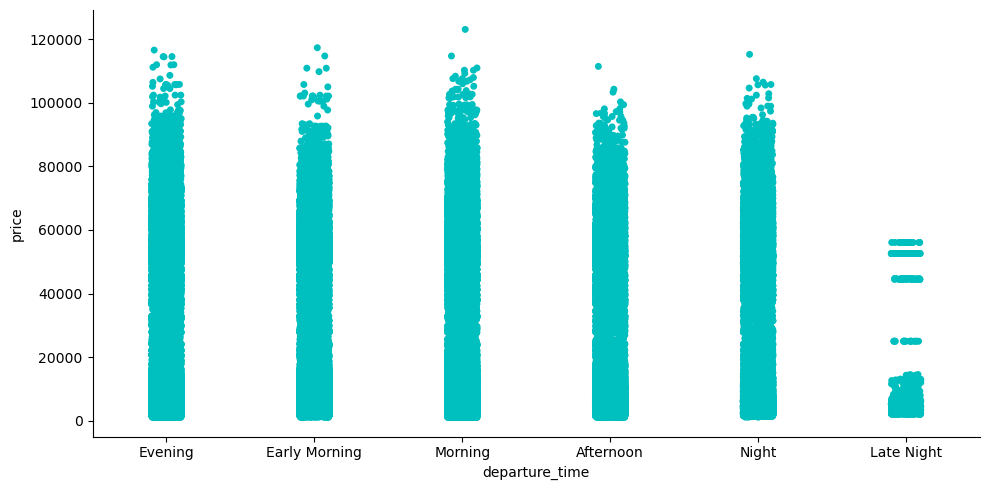

In [37]:
sns.catplot(x='departure_time',y='price',kind='strip',data=df,color = "c",aspect = 2)

**2. Arrival Time Vs Ticket Price**

Ticket Price is More for the Flights when the Arrival Time is at Evening

Ticket Price is almost equal for flights Having Arrival time is at Morning and Night

Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

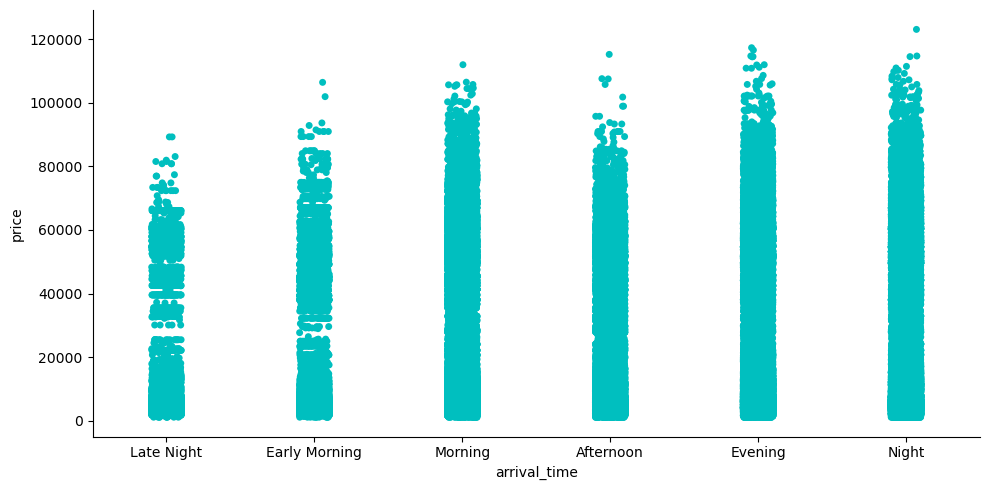

In [38]:
sns.catplot(x='arrival_time',y='price',kind='strip',data=df,color = "c",aspect = 2)

##### Q4. How the price changes with change in Source and Destination?
**Ans:** **1. Source City Vs Ticket Price**

Ticket Price is More for the Flights whose Source City is Kolkata

Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , delhi and Bangalore

Ticket Price is Low for the Flights Having Source City as Hydrabad

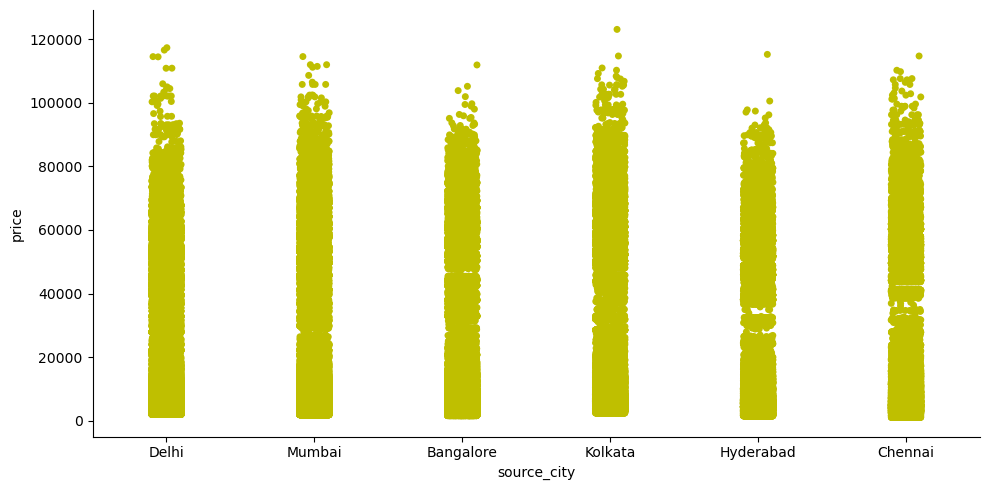

In [39]:
sns.catplot(x='source_city',y='price',kind='strip',data=df,color = "y",aspect = 2)

**2. Destination City Vs Ticket Price**

Ticket Price is More for the Flights whose Destination City is kolkata and Delhi

Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore

Ticket Price is Low for the Flights Having Destination City as Chennai

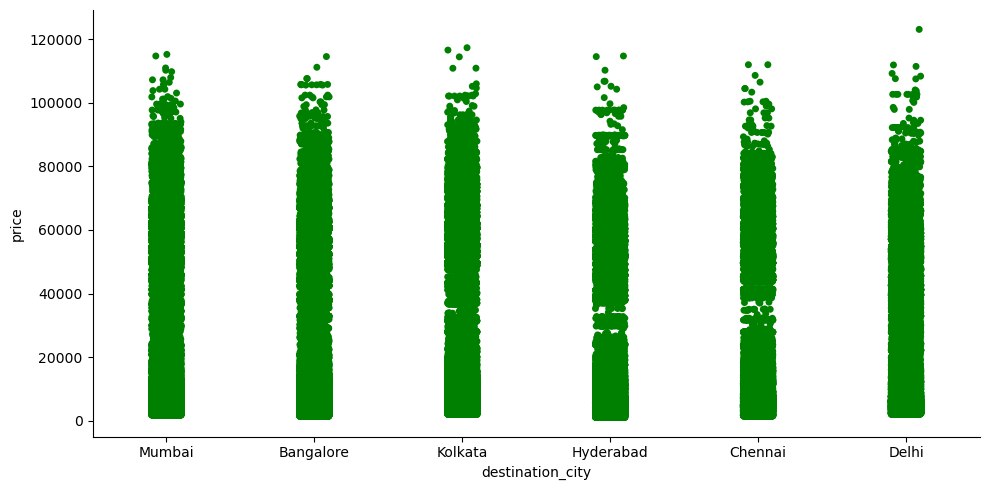

In [40]:
sns.catplot(x='destination_city',y='price',kind='strip',data=df,color = "g",aspect = 2)

In [41]:
# The price variation between source and destination in each airline
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean()

,airline,source_city,destination_city,price
0,Air India,Bangalore,Chennai,26765.567702
1,Air India,Bangalore,Delhi,20699.099886
2,Air India,Bangalore,Hyderabad,23395.956912
3,Air India,Bangalore,Kolkata,29105.826259
4,Air India,Bangalore,Mumbai,25625.530802
...,...,...,...,...
178,Vistara,Mumbai,Bangalore,35029.880315
179,Vistara,Mumbai,Chennai,32181.946251
180,Vistara,Mumbai,Delhi,26402.695114
181,Vistara,Mumbai,Hyderabad,29497.578017


In [42]:
# here is the average price between city 
pd.pivot_table(data = df,columns = "source_city",index = "destination_city", values = "price")

source_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
destination_city,,,,,,
Bangalore,NaN,25081.850454,17880.216315,21245.945429,22744.808428,23147.873807
Chennai,23321.850078,NaN,19369.881354,21848.065989,23660.361040,22781.899112
Delhi,17723.313972,18981.863948,NaN,17242.639473,19422.354559,18725.320008
Hyderabad,21152.051053,21591.345404,17347.288379,NaN,21500.011397,20992.128567
Kolkata,23498.234221,22669.932407,20566.409418,20823.893201,NaN,22379.146723
Mumbai,23127.231376,22765.849647,19354.405336,20065.715179,22078.883579,NaN


<AxesSubplot:xlabel='destination_city'>

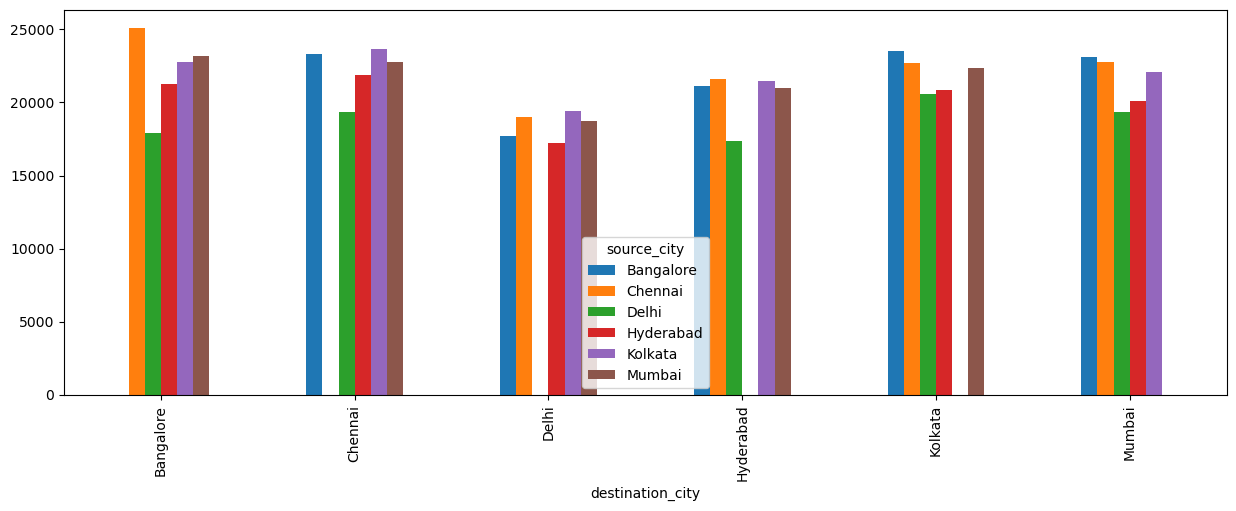

In [43]:
# Plotting the information regarding price variance between cities
_ = pd.crosstab(columns = df["source_city"],index = df["destination_city"], values = df["price"], aggfunc="mean")
_.plot(kind = "bar",figsize = (15,5))

##### Q5. How does the ticket price vary between Economy and Business class?
**Ans:** The business class price is higher than economy class

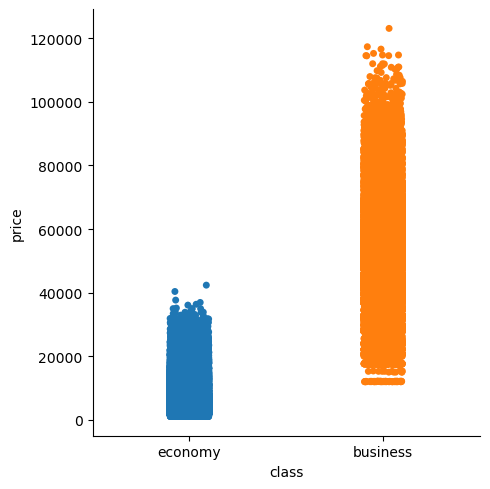

In [44]:
sns.catplot(data = df, x = "class", y = "price", aspect = 1,height = 5)

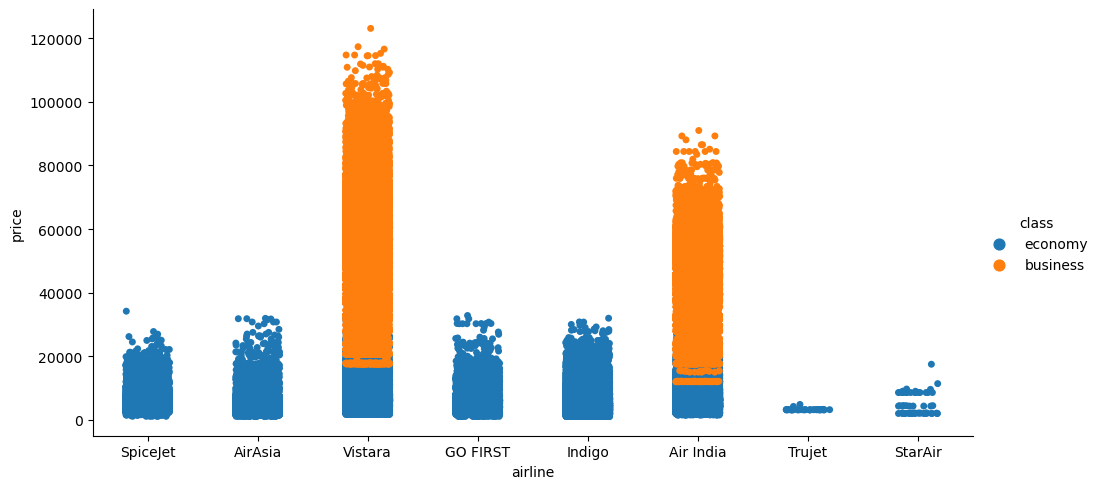

In [45]:
sns.catplot(data = df, x = "airline", y = "price", 
            hue = "class", jitter = 0.2, aspect = 2,height = 5)

<AxesSubplot:>

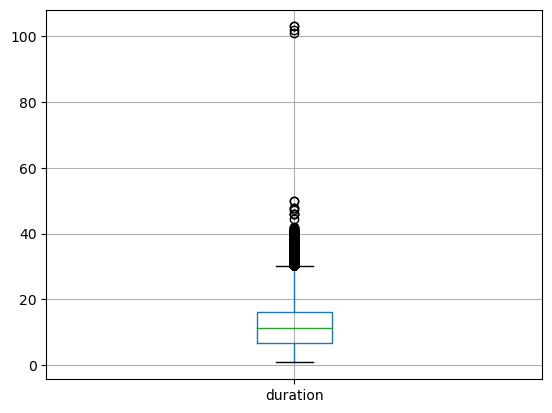

In [46]:
#  We can see that we have outliers in duration feature but we will not replace them
#  in place of replacing them we will reduce their effect as it is 
#  the real time, which is taken by flight from source and destination
df.boxplot(column ="duration")

<AxesSubplot:>

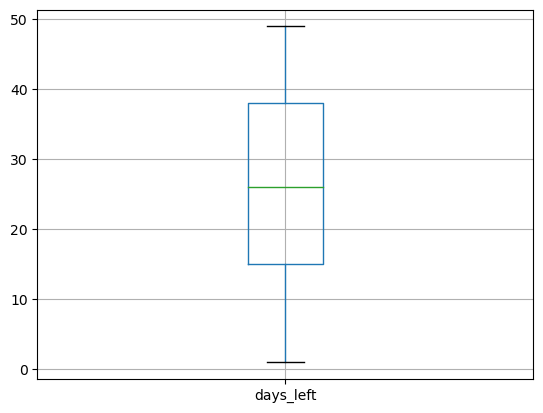

In [47]:
df.boxplot(column ="days_left") # no outliers are found

# 4. Feature Engineering

In [48]:
# dropping the duplicate rows
df.drop_duplicates(inplace = True)

In [49]:
df.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,economy,2.17,1,5953


In [50]:
#as we have seen that we are getting information from airline so we have no need for flight feature
df1 = df.drop("flight", axis = 1)
df1.head(1)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,economy,2.17,1,5953


In [51]:
# as we know we have ordinal data in the following featues so we directly replace them according to order
df1["departure_time"].replace({'Late Night':0,'Early Morning':1,'Morning':2,
                               'Afternoon':3,'Evening':4,'Night':5},inplace=True)
df1["arrival_time"].replace({'Late Night':0,'Early Morning':1,'Morning':2,
                             'Afternoon':3,'Evening':4,'Night':5},inplace=True)
df1["class"].replace({"economy":0,"business":1},inplace=True)
df1.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,4,0,5,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,1,0,2,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,1,0,1,Mumbai,0,2.17,1,5956


In [52]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df1[list(df1["airline"].unique())] = ohe.fit_transform(df1[["airline"]]).A # making sparse metrics to metrics
df1 = pd.concat([df1,pd.get_dummies(df1["destination_city"],prefix = "destination_city")], axis = 1)
df1 = pd.concat([df1,pd.get_dummies(df1["source_city"],prefix = "source_city")], axis = 1)
df1.drop(["airline","source_city","destination_city"],axis = 1,inplace=True)
df1.head(1)

,departure_time,stops,arrival_time,class,duration,days_left,price,SpiceJet,AirAsia,Vistara,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,4,0,5,0,2.17,1,5953,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0


# 5. Feature Selection

In [53]:
# As we can see there is low dimentionality of the data no need for high feature selections
# if we will drop some featuers so there is high chances that our model will be undercutted. 
# That's why we will see the model perfomance without feature selection first.

# 6. Model Selection and Training

In [54]:
df1.dtypes

departure_time                   int64
stops                            int64
arrival_time                  category
class                            int64
duration                       float64
days_left                        int64
price                            int64
SpiceJet                       float64
AirAsia                        float64
Vistara                        float64
GO FIRST                       float64
Indigo                         float64
Air India                      float64
Trujet                         float64
StarAir                        float64
destination_city_Bangalore       uint8
destination_city_Chennai         uint8
destination_city_Delhi           uint8
destination_city_Hyderabad       uint8
destination_city_Kolkata         uint8
destination_city_Mumbai          uint8
source_city_Bangalore            uint8
source_city_Chennai              uint8
source_city_Delhi                uint8
source_city_Hyderabad            uint8
source_city_Kolkata      

In [55]:
# seperating the dependent and independent variables
X = df1.drop("price", axis = 1)
y = df1["price"]

In [56]:
X.shape

(300259, 26)

In [57]:
y.shape

(300259,)

## Importing Decision Tree regression Model from SKLEARN for comparision

In [58]:
from sklearn.model_selection import train_test_split


In [59]:

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3,random_state=44)

In [60]:
X_train.shape

(210181, 26)

In [61]:
Y_test.shape

(90078,)

In [62]:
Y_train.shape

(210181,)

In [63]:
X_test.shape

(90078, 26)

In [64]:
# create a regressor object
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [65]:
pred = regressor.predict(X_test)
pred

array([ 6173.,  5910.,  5276., ..., 13108., 61873.,  7084.])

In [66]:
from sklearn import  metrics

In [67]:
print('MAE',metrics.mean_absolute_error(Y_test,pred))
print('MSE',metrics.mean_squared_error(Y_test,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

MAE 1180.710197458499
MSE 12389418.122010615
RMSE 3519.8605259314772


In [68]:
metrics.explained_variance_score(Y_test,pred)

0.9759417043324521

# Hyper Parameter tuning

In [69]:
# Hyper parameters range intialization for tuning 

parameters={'max_depth': [None, 1, 2, 3, 4], 
             'min_samples_split': [2, 3, 4, 5],
             'min_samples_leaf': [1, 2, 3]}

Above we intialized hyperparmeters random range using Gridsearch to find the best parameters for our decision tree model.

In [70]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [71]:
tuning_model=GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [72]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)


In [73]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X_train,Y_train)

timer(start_time)

In [74]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [75]:
# best model score
tuning_model.best_score_

-10113090.230260944

# Training Decision Tree With Best Hyperparameter

In [76]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=None, min_samples_leaf=3, min_samples_split=2)

In [77]:
# fitting model


tuned_hyper_model.fit(X_train,Y_train)

DecisionTreeRegressor(min_samples_leaf=3)

In [78]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

In [80]:
# with hyperparameter tuning 
print('MAE:', metrics.mean_absolute_error(Y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(Y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, tuned_pred)))

MAE: 1189.0534299638728
MSE: 9388732.765522147
RMSE: 3064.103909060877


In [81]:
# without hyperparameter tuning
print('MAE',metrics.mean_absolute_error(Y_test,pred))
print('MSE',metrics.mean_squared_error(Y_test,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

MAE 1180.710197458499
MSE 12389418.122010615
RMSE 3519.8605259314772


In [82]:
tuned_hyper_model.score(X_test,Y_test)# with hyper parameter tuning

0.9817665117581261

In [83]:
regressor.score(X_test,Y_test)# without hyper parameter tuning

0.9759389988731055

In [84]:
metrics.explained_variance_score(Y_test,tuned_pred) # with hyper parameter tuning

0.981766913782292

In [85]:
metrics.explained_variance_score(Y_test,pred)# without hyper parameter tuning

0.9759417043324521

# ID3 algorithm from scratch

In [86]:
def train_test_split(Data, test_ratio):
    
    Data=Data.sample(frac=1,random_state=42)

    samples=int(len(Data)*(1-test_ratio))

    train_data=Data[:samples]
    test_data=Data[samples:]

    return train_data, test_data


In [87]:
train_data, test_data = train_test_split(df1, 0.2)

In [88]:
X_train,Y_train=train_data.loc[:,train_data.columns != 'price'].values, train_data.loc[:,'price'].values.reshape(-1,1)
X_test,Y_test=test_data.loc[:,test_data.columns != 'price'].values, test_data.loc[:,'price'].values.reshape(-1,1)

In [89]:
X_train.shape

(240207, 26)

In [90]:
Y_train.shape

(240207, 1)

In [91]:
X_test.shape

(60052, 26)

In [92]:
Y_test.shape

(60052, 1)

In [93]:

# Define the ID3 decision tree regression algorithm
class DecisionTreeRegressor:
    def __init__(self, max_depth=5, min_samples_leaf=5):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.left = None
        self.right = None
        self.feature_idx = None
        self.threshold = None
        self.value = None

    def split(self, X, y):
        best_mse = np.inf
        best_feature_idx = None
        best_threshold = None
        for feature_idx in range(X.shape[1]):
            feature_values = np.unique(X[:, feature_idx])
            for threshold in feature_values:
                left_indices = X[:, feature_idx] <= threshold
                right_indices = X[:, feature_idx] > threshold
                if len(y[left_indices]) < self.min_samples_leaf or len(y[right_indices]) < self.min_samples_leaf:
                    continue
                mse_left = np.var(y[left_indices])
                mse_right = np.var(y[right_indices])
                mse = mse_left + mse_right
                if mse < best_mse:
                    best_mse = mse
                    best_feature_idx = feature_idx
                    best_threshold = threshold
        return best_feature_idx, best_threshold, best_mse

    def fit(self, X, y, depth=0):
        if depth == self.max_depth or len(y) < self.min_samples_leaf:
            self.value = np.mean(y)
            return
        self.feature_idx, self.threshold, _ = self.split(X, y)
        if self.feature_idx is None:
            self.value = np.mean(y)
            return
        left_indices = X[:, self.feature_idx] <= self.threshold
        right_indices = X[:, self.feature_idx] > self.threshold
        self.left = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf)
        self.left.fit(X[left_indices], y[left_indices], depth+1)
        self.right = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf)
        self.right.fit(X[right_indices], y[right_indices], depth+1)

    def predict(self, X):
        if self.value is not None:
            return self.value
        elif X[self.feature_idx] <= self.threshold:
            return self.left.predict(X)
        else:
            return self.right.predict(X)

# Train the decision tree regression model
tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)
tree.fit(X_train, Y_train)

# Predict the target variable on the test set
Y_pred = np.array([tree.predict(x) for x in X_test])

# Calculate the mean squared error of the predictions
mse = np.mean((Y_test - Y_pred) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 983871912.5821302


In [94]:
Y_pred

array([6613.84579719, 6613.84579719, 6613.84579719, ..., 6613.84579719,
       6613.84579719, 6613.84579719])

In [95]:
pred_df = pd.DataFrame({'predprice':Y_pred})

In [96]:
pred_df.head()

,predprice
0,6613.845797
1,6613.845797
2,6613.845797
3,55017.685209
4,6613.845797


In [97]:
print("Predicted values:", Y_pred)
print("Actual values:", Y_test)

Predicted values: [6613.84579719 6613.84579719 6613.84579719 ... 6613.84579719 6613.84579719
 6613.84579719]
Actual values: [[ 3393]
 [14658]
 [ 6375]
 ...
 [ 8440]
 [ 4367]
 [ 3999]]


Max depth: This parameter defines the maximum depth of the tree,

Min samples split: This parameter specifies the minimum number of samples required to split an internal node. If a node has fewer samples than this parameter, it won't be split, which can help prevent overfitting.

Min samples leaf: This parameter defines the minimum number of samples required to be at a leaf node. If a leaf node has fewer samples than this parameter, it will be pruned, which can help prevent overfitting.

In [98]:
import itertools

# Define the hyperparameter values to search 
max_depth = [3, 5, 7]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
param_values = [max_depth, min_samples_split, min_samples_leaf]

# Create a decision tree regression object
dt = DecisionTreeRegressor()

# Initialize variables to hold the best hyperparameters and the corresponding mean squared error
best_params = None
best_mse = float('inf')

# Loop through all combinations of hyperparameters
for param_combination in itertools.product(*param_values):
    # Set the hyperparameters for the decision tree
    dt.max_depth = param_combination[0]
    dt.min_samples_split = param_combination[1]
    dt.min_samples_leaf = param_combination[2]
    
    
    
    # Make predictions on the testing data
    y_pred = np.array([tree.predict(x) for x in X_test])
    
    # Calculate the mean squared error
    mse = np.mean((Y_test - y_pred) ** 2)
    
    # If the current combination of hyperparameters gives a lower mean squared error than the best so far, update the best hyperparameters and the corresponding mean squared error
    if mse < best_mse:
        best_params = param_combination
        best_mse = mse

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters: ", best_params)
print("Mean squared error: ", best_mse)


Best hyperparameters:  (3, 2, 1)
Mean squared error:  983871912.5821302


# From Scratch results

In [102]:
# with hyperparameter tuning 
print('MAE:', metrics.mean_absolute_error(Y_test,y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 4259.847693893963
MSE: 42291172.00763455
RMSE: 6503.166306318373


In [103]:
# without hyperparameter tuning 
print('MAE:', metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 4259.847693893963
MSE: 42291172.00763455
RMSE: 6503.166306318373


# Conclusion

In this notebook i predicted the ticket price of flight from Decision tree regression using ID3 algorithm from both sklearn model and from scratch as well and got good results